In [1]:
from diffusers import DiffusionPipeline
import torch
import matplotlib.pyplot as plt
import os
os.chdir('../')

In [2]:
%pwd

'c:\\Projects\\python\\journAI'

In [3]:

# **1️⃣ Define Local Model Path**
local_model_path = "./models/sdxl-turbo_local"
image_path = "./assets/bunty5.jpg"
prompt = """Generate a face of a man who is clever but childish dumb, who is very slim, is a lazy ass.
Has black hair and black eyes, has indian brown skin tone, his age is in mid 20s, has sharp face.
His face provokes you to become violent towards him.
Who is a fuck boy, has no self respect what so ever, who is bullied by a gay person.
His main contribution to the society is washing dishes."""



# """
# Generate a beach with crystal-clear water, reflecting the brilliant blue sky. 
# The vast landscape stretches to the horizon, where the ocean meets the sky in a seamless embrace. 
# Along the shoreline, lush green trees sway gracefully in the sea breeze, adding to the serene and picturesque atmosphere.
# """

## Image generation pipeline

In [4]:


# # **2️⃣ Download & Store Model Locally (Only Runs Once)**
# def download_model():
#     """Download SDXL Turbo from Hugging Face and save locally."""
#     print("⏳ Downloading SDXL Turbo...")
#     pipeline = DiffusionPipeline.from_pretrained(
#         "stabilityai/sdxl-turbo",
#         torch_dtype=torch.float16,  # Use FP16 for speed & efficiency
#         variant="fp16"
#     )
#     pipeline.save_pretrained(local_model_path)
#     print(f"✅ Model downloaded and saved locally at {local_model_path}")

# # Run only if the model is not downloaded
# try:
#     with open(f"{local_model_path}/model_index.json", "r"):
#         print("✅ SDXL Turbo model already exists locally.")
# except FileNotFoundError:
#     download_model()


In [5]:
# **3️⃣ Load Model from Local Storage with Optimizations**
def load_model():
    """Load SDXL Turbo from local storage with optimizations."""
    print("⏳ Loading SDXL Turbo with optimizations...")
    
    pipeline = DiffusionPipeline.from_pretrained(
        local_model_path,
        torch_dtype=torch.float16  # FP16 for faster inference
    ).to("cuda")  # Move model to GPU

    # controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-depth")
    
    # pipeline = StableDiffusionControlNetPipeline.from_pretrained(
    #     local_model_path,
    #     controlnet=controlnet,
    #     torch_dtype=torch.float16
    # ).to("cuda")

    pipeline.enable_vae_slicing()

    # ✅ Use FP16 Execution for Faster Performance
    torch.backends.cudnn.benchmark = True

    print("✅ Model loaded successfully with optimizations!")
    return pipeline

# def upscale_image(image, scale=2):
#     """Upscales the image using Real-ESRGAN for high-definition output."""
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     model = RealESRGANer(device, scale=scale)
#     model.load_weights("weights/realesrgan-x4.pth")
    
#     upscaled_image = model.predict(image)
#     return upscaled_image


# **4️⃣ Generate Image**
def generate_image(prompt,image_path="./assets/output.jpg"):
    """Generates an image using SDXL Turbo with an optimized pipeline."""
    pipeline = load_model()

    print(f"🎨 Generating image for: '{prompt}' ...")
    image = pipeline(prompt, num_inference_steps=5, guidance_scale=2.0).images[0]

    # upscaled_image = upscale_image(image, scale=2)

    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    image.save(image_path)
    print(f"✅ Image saved as {image_path}")




## Output

⏳ Loading SDXL Turbo with optimizations...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (95 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['who is bullied by a gay person. his main contribution to the society is washing dishes.']


✅ Model loaded successfully with optimizations!
🎨 Generating image for: 'Generate a face of a man who is clever but childish dumb, who is very slim, is a lazy ass.
Has black hair and black eyes, has indian brown skin tone, his age is in mid 20s, has sharp face.
His face provokes you to become violent towards him.
Who is a fuck boy, has no self respect what so ever, who is bullied by a gay person.
His main contribution to the society is washing dishes.' ...


Token indices sequence length is longer than the specified maximum sequence length for this model (95 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['who is bullied by a gay person. his main contribution to the society is washing dishes.']


  0%|          | 0/5 [00:00<?, ?it/s]

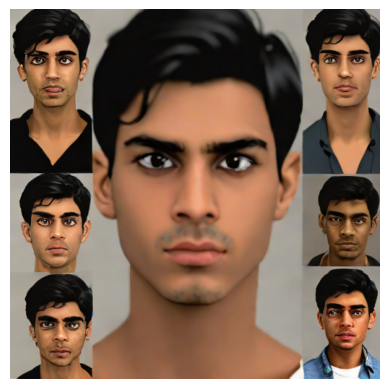

✅ Image saved as ./assets/bunty5.jpg


In [6]:
generate_image(prompt,image_path=image_path)